# Proyek Analisis Data: Bike Sharing
- **Nama:** Reisya Junita Putri
- **Email:** reisyajunita@gmail.com
- **ID Dicoding:** reisyajunita

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbandingan jumlah penyewaan sepeda pada workingday dan holiday?
2. Jam berapa pengguna paling banyak menggunakan rental bike sharing?
3. Bagaimana distribusi penyewaan sepeda antara 2011 dan 2012?
4. Musim apa yang penggunanya paling banyak menggunakan bike sharing?
5. Adakah hubungan antara temp, hum, windspeed terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang digunakan

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [42]:
day_df = pd.read_csv("day.csv")

In [43]:
hour_df = pd.read_csv("hour.csv")

In [44]:
# Memuat Tabel Day
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:
# Memuat Tabel Hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:**


### Assessing Data

In [46]:
# Melihat kualitas data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

Tidak ada masalah pada jumlah data seluruh kolom akan tetapi terdapat 2 tipe data yang akan diubah untuk mempermudah analisis data:
1. Pada kolom **dteday** yang seharusnya tipe data **datetime**, bukan **object**.
2. Pada kolom **season** kita ganti dari  **int** menjadi **category**.


In [47]:
# Melihat duplikasi data day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**insight:**
Tidak terdapat duplikasi data

In [48]:
# Ringkasan Parameter Statisitik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Jika diperhatikan, tidak terdapat keanehan pada parameter statistik di atas.

In [49]:
# Melihat kualitas data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Tidak ada masalah pada jumlah data seluruh kolom akan tetapi terdapat 2 tipe data yang akan diubah untuk mempermudah analisis data:
1. Pada kolom **dteday** yang seharusnya tipe data **datetime**, bukan **object**.
2. Pada kolom **season** kita ganti dari  **int** menjadi **category**.

In [50]:
# Melihat duplikasi data hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:** tidak terdapat duplikasi data pada tabel hour_df.

In [51]:
# Ringkasan Parameter Statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Jika diperhatikan, tidak terdapat keanehan pada parameter statistik di atas.

**Rangkuman Masalah**

|          | Tipe Data | Missing Value |  Duplikasi Data  |  Inaccurate Value  |
|----------|-----------|---------------|------------------|--------------------|
|  day_df  |  Terdapat kesalahan tipe data untuk kolom dteday & season|   -   |  -   |  -|
|  hour_df |Terdapat kesalahan tipe data untuk kolom dteday & season|- | - | - |

### Cleaning Data

In [52]:
# Mengganti tipe data dteday pada tabel day_df
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [53]:
# Mengganti tipe data season pada tabel day_df
day_df["season"] = day_df["season"].astype("category")

In [54]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(1), datetime64

In [55]:
# Menganti tipe data dteday pada tabel hour_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [56]:
# Menganti tipe data season pada tabel hour_df
hour_df["season"] = hour_df["season"].astype("category")

In [57]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis

In [58]:
# Eksplorasi Data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Berdasarkan rangkuman parameter statistik di atas, diketahui bahwa rata-rata penyewaan terjadi paling banyak ada pada hari kerja (workingday) sebanyak 0.684 atau 68.4%. Dari sini kita bisa melihat bahwa para pengguna lebih sering menggunakan bike sharing ketika hari kerja dibandingkan pada hari libur, yang dapat diartikan bahwa para pengguna menyewa sepeda untuk melakukan aktivitas rutin seperti bekerja, sekolah, dll.

In [59]:
day_df.corr(numeric_only=True) 

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


**Insight:**
Dari tabel korelasi di atas, pada kolom temp dengan cnt di dapat hubungan korelasinya sebesar 0.627494 atau mendekati 1 dapat diartikan bahwa hubungan antara temp (suhu) dengan cnt (total penyewa) memiliki korelasi positif yang cukup kuat.
selain itu juga ada hubungan antara registered dengan cnt sebesar 0.945517 atau sangat mendekati 1, dapat diartikan bahwa hubungan antara registered dengan total penyewa memiliki korelasi positif yang kuat.

In [60]:
# Melihat jumlah total penyewaan sepeda tertinggi
day_df.sort_values(by="cnt", ascending=False).head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294


In [61]:

casual = day_df["casual"].sum()
registered = day_df["registered"].sum()
print(f"total casual: {casual}")
print(f"total registered: {registered}")

total = casual + registered 
print(f"total: {total}")

count = day_df["cnt"].sum()
print(f"total count: {count}")

total casual: 620017
total registered: 2672662
total: 3292679
total count: 3292679


In [62]:
# Melihat demografi penyewa sepeda terhadap hari
day_df.groupby(by="weekday").agg({
    "workingday": "sum",
    "holiday": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,workingday,holiday,cnt
weekday,,,
5,102,2,487790
4,102,2,485395
6,0,0,477807
3,103,1,473048
2,103,1,469109
1,90,15,455503
0,0,0,444027


**Insight:** Berdasarkan pivot table di atas, dapat diketahui bahwa:
1. Pada hari senin-jumat (1-5) memiliki total penyewaan sepeda tertinggi dibandingkan pada hari akhir pekan, terutama pada hari Jumat.
2. Pada akhir pekan (Sabtu (6) dan Minggu (0)) juga menunjukkan total penyewaan yang signifikan, meskipun bukan hari kerja atau libur.
3. Dari keseluruhan hari, didapat bahwa hari Jumat adalah hari yang tertinggi memiliki total penyewaan. 

In [63]:
# Melihat Jumlah Penyewaan Sepeda Berdasarkan Musim
day_df.groupby(by="season", observed=True).agg({
    "weathersit": "mean",
    "temp": ["mean", "std"],
    "atemp": ["mean", "std"],
    "hum": ["mean", "std"],
    "windspeed": ["mean", "std"],
    "cnt": "sum"
}).sort_values(by=("cnt", "sum"), ascending=False)

weathersit      temp               atemp                 hum            \
             mean      mean       std      mean       std      mean       std   
season                                                                          
3        1.297872  0.706309  0.070848  0.655898  0.072056  0.633482  0.119349   
2        1.402174  0.544405  0.122650  0.520307  0.108022  0.626948  0.152841   
4        1.477528  0.422906  0.107834  0.415539  0.095536  0.668719  0.131248   
1        1.408840  0.297748  0.102735  0.296914  0.099026  0.582903  0.151880   

       windspeed                cnt  
            mean       std      sum  
season                               
3       0.172095  0.059526  1061129  
2       0.203507  0.071629   918589  
4       0.171995  0.081565   841613  
1       0.214537  0.086439   471348

**Insight:**
Berdasarkan pivot table di atas, diketahui bahwa:
1. Pada musim panas (Summer (3)), memiliki jumlah total penyewa sepeda tertinggi sedangkan musim dingin atau winter terendah.
2. Penyewaan sepeda cenderung lebih rendah saat kelembapan dan kecepatan angin tinggi.
3. Cuaca cerah lebih mendukung peningkatan penyewaan sepeda.

In [64]:
# Eksplorasi Data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Berdasarkan rangkuman parameter statistik di atas, didapat bahwa rata-rata pengguna melakukan penyewaan sepeda pada jam 11.54. 

In [65]:
# Melihat demografi penyewa sepeda terhadap jam 
hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


**Insight:**
Berdasarkan pivot table di atas, diketahui bahwa pada sekitar jam 17 atau 5 sore sebanyak 336.860 memiliki penyewa terbanyak lalu diikuti oleh jam 18 atau 6 sore sebanyak 309.772. Jika dilihat pada jam-jam tersebut, bisa kita perkirakan bahwa para pengguna menyewa sepeda untuk kebutuhan aktivitas rutin mereka, seperti pulang bekerja, pulang sekolah, atau bahkan untuk berolahraga.

In [66]:
# Melihat demografi penyewa sepeda terhadap bulan 
hour_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


**Insight:**
Berdasarkan pivot table di atas, diketahui bahwa:
1. Pada bulan ke-8 (Agustus) adalah bulan yang memiliki total penyewa terbanyak, sedangkan bulan dengan penyewa terendah ada di bulan ke-1 (Januari).
2. Penyewaan Registered selalu jauh lebih banyak dibandingkan casual setiap bulannya.
3. Penyewaan sepeda cenderung tinggi di bulan musim panas (Mei hingga September) dan penyewaan menurun signifikan di musim dingin (Desember hingga Februari).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Perbandingan Jumlah Penyewaan Sepeda pada Workingday dan Holiday?

In [67]:
workingday_total = day_df[day_df["workingday"] == 1]["cnt"].sum()
holiday_total = day_df[day_df['holiday'] == 1]['cnt'].sum()

print(f"Total penyewaan sepeda pada hari kerja: {workingday_total}")
print(f"Total penyewaan sepeda pada hari libur: {holiday_total}")

Total penyewaan sepeda pada hari kerja: 2292410
Total penyewaan sepeda pada hari libur: 78435


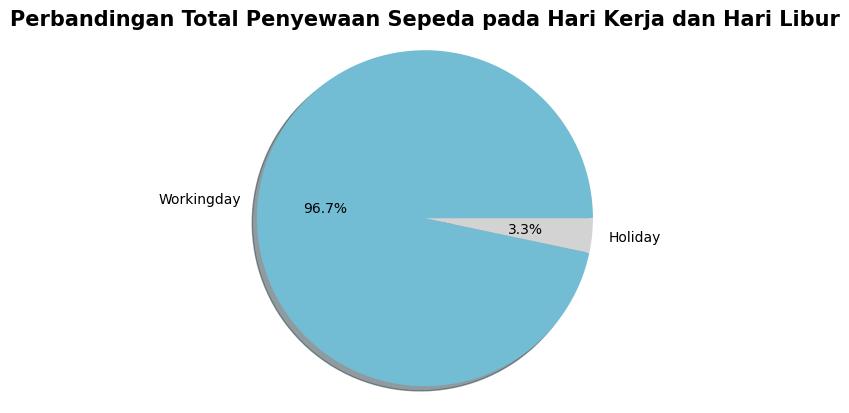

In [68]:
# Visualisasi Data
colors = ["#72bcd4", "#d3d3d3"]
plt.pie( [workingday_total, holiday_total], labels=["Workingday", "Holiday"],colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Perbandingan Total Penyewaan Sepeda pada Hari Kerja dan Hari Libur", fontsize=15, fontweight='bold')
plt.axis("equal")
plt.show()

**Insight:**
Berdasarkan pie chart di atas, terlihat bahwa Workingday mendominasi total penyewaan sepeda, dengan proposi sekitar 96.7% dibandingkan holiday yang hanya 3.3%. Artinya, penyewaan sepeda cenderung lebih tinggi pada Workingday karena kemungkinan besar mereka melakukan penyewaan sepeda untuk alat transportasi dalam bekerja atau beraktivitas rutin.

### Pertanyaan 2: Jam berapa pengguna paling banyak menggunakan rental bike sharing?

In [69]:
# Melihat Pola Waktu Pengguna Menyewa Bike Sharing
# Menghitung mode dari kolom 'hr'
mode_hour = hour_df['hr'].mode()[0]

# Menghitung median dari kolom 'hr'
median_hour = hour_df['hr'].median()
print(f"Mode dari kolom 'hr': {mode_hour}")
print(f"Median dari kolom 'hr': {median_hour}")

Mode dari kolom 'hr': 16
Median dari kolom 'hr': 12.0


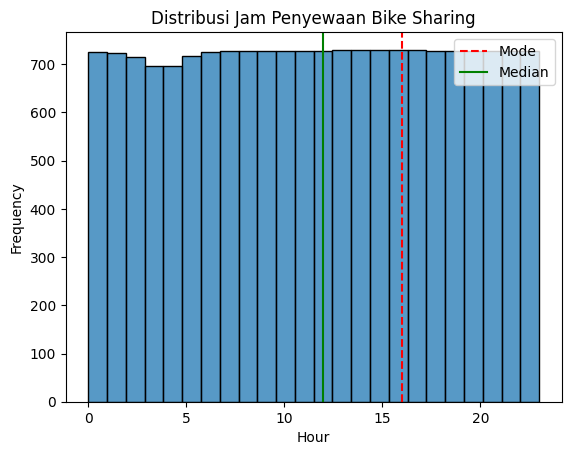

In [70]:
# Membuat histogram untuk visualisasi
sns.histplot(data=hour_df, x="hr", bins=24)
plt.title("Distribusi Jam Penyewaan Bike Sharing")
plt.xlabel("Hour")
plt.ylabel("Frequency")

# Menandai mode dan median pada histogram
plt.axvline(mode_hour, color='red', linestyle='--', label='Mode')
plt.axvline(median_hour, color='green', linestyle='-', label='Median')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

**Insight:**
Berdasarkan Histogram di atas:
1. Pada garis merah putus-putus (mode) menunjukkan bahwa sekitar jam 16 atau 4 sore adalah waktu yang paling sering terjadinya penyewaan sepeda. Kemungkinan penyewa menggunakan rental ini untuk aktivitas terkait pulang kerja, sekolah, atau aktivitas lainnya yang dilakukan pada sore hari.
2. Pada garis hijau (median) menunjukkan bahwa setengah dari total penyewaan terjadi sebelum jam 12 atau siang hari dan setengahnya lagi setelahnya.

### Pertanyaan 3: Bagaimana Distribusi Penyewaan Sepeda antara Tahun 2011 dan 2012?

In [71]:
# Melihat Rentang Total Penyewaan Bike Sharing dari Tahun 2011 sampai 2012
day_df["yr"] = day_df["dteday"].dt.year
year_counts = day_df.groupby("yr")["cnt"].sum()

print(year_counts)

yr
2011    1243103
2012    2049576
Name: cnt, dtype: int64


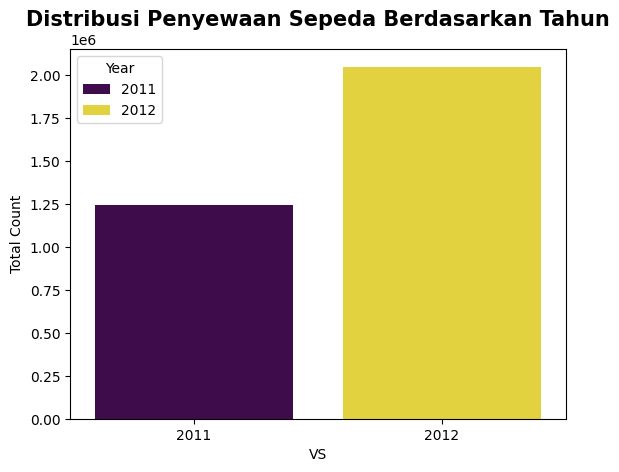

In [72]:
sns.barplot(data=day_df, x="yr", y="cnt",estimator="sum", errorbar=None, hue="yr", palette="viridis") 
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Tahun", fontsize=15, fontweight='bold')
plt.xlabel("VS")
plt.ylabel("Total Count")
plt.legend(title="Year")
plt.xticks(ticks=[0, 1], labels=["2011", "2012"])
plt.show()

**Insight:**
Berdasarkan grafik di atas, diketahui bahwa perbandingan penyewa sepeda antara tahun 2011 dengan 2012 mengalami peningkatan yang positif. Di mana pada tahun 2011 total penyewanya sebesar 1.243.103, sedangkan pada tahun 2012 mengalami peningkatan sebesar 2.049.576.

### Pertanyaan 4: Musim apa yang penggunanya paling banyak menggunakan Bike Sharing?

In [73]:
# Musim (season) yang paling banyak penyewaan bike sharing
fav_season = day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

print(fav_season)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64


C:\Users\Reisya\AppData\Local\Temp\ipykernel_14532\2238536012.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fav_season = day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)


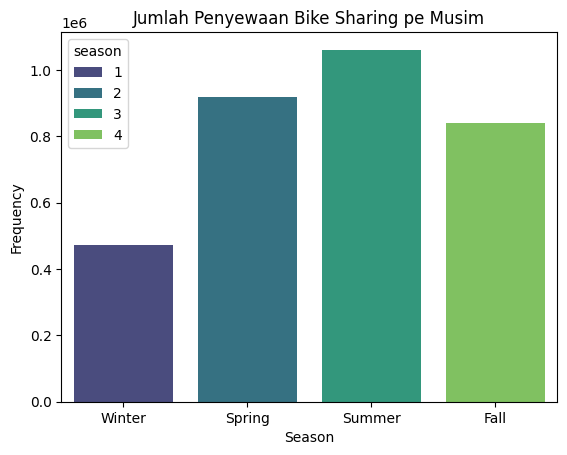

In [74]:
# Visualisasi Data Jumlah Rental Bike Sharing per Musim
sns.barplot(data=day_df, x="season", y="cnt", estimator=sum, errorbar=None, hue="season", palette="viridis")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Winter", "Spring", "Summer", "Fall"])
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.title("Jumlah Penyewaan Bike Sharing pe Musim")
plt.show()

**Insight:**
Berdasarkan Barplot di atas, diketahui bahwa total penyewaan sepeda terbanyak berada pada musim summer sebesar 1.061.129 dan diikuti oleh spring. Artinya, para penyewa lebih memilih rental bike pada musim tersebut karena pada musim summer adalah musim terbaik untuk bersepeda atau beraktivitas dibandingkan dengan musim-musim lainnya.

## Regression Linear

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# Menggunakan dataset day_df
X = day_df[["temp", "hum", "windspeed"]] # variabel independen
y = day_df["cnt"] # variabel dependen


In [77]:
# Split data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Membuat model Regresi Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [80]:
# Evaluasi model Linear Regression
y_pred_lr = linear_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error: ", mse_lr)
print("Linear Regression R-squared:", r2_lr)

Linear Regression Mean Squared Error:  2020722.2320442528
Linear Regression R-squared: 0.49606445111931263


**Insight:**

**MSE:** Berdasarkan hasil MSE yaitu 2,020,722.23 ini artinya MSE lebih rendah yang menunjukkan model yang lebih baik dalam memprediksi nilai sebenarnya.

**R²** sebesar 0.496 menunjukkan bahwa model menjelaskan sekitar 49.6% dari variasi dalam data, mengindikasikan ada faktor lain yang mempengaruhi jumlah peminjaman sepeda yang belum terakomodasi dalam model.

In [151]:
# Interpretasi Koefisien
print("Linear Regression Koefisien:", linear_model.coef_)
print("Linear Regression Intercept:", linear_model.intercept_)

Linear Regression Koefisien: [ 6589.71492487 -2995.74397695 -4153.0138785 ]
Linear Regression Intercept: 3947.7519452018432


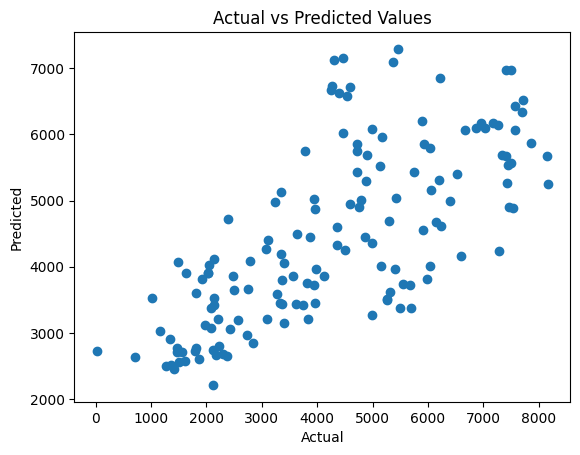

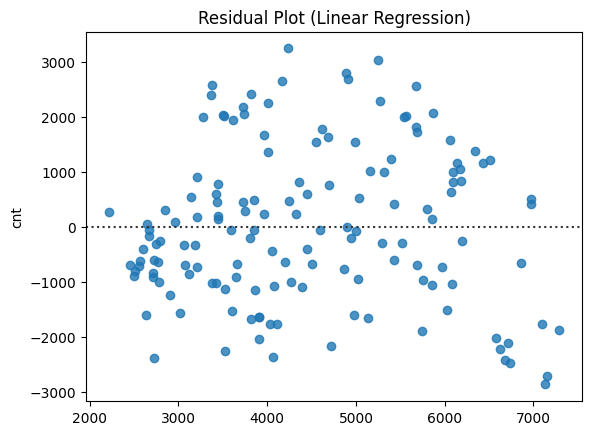

In [ ]:
# Visualisasi
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot residual
residuals_lr = y_test - y_pred_lr
sns.residplot(x=y_pred_lr, y=residuals_lr)
plt.title('Residual Plot (Linear Regression)')
plt.show()

In [165]:
# Membuat model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi pada data test dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest MSE: 2130239.6487857145
Random Forest R-squared: 0.4687525728995283


**Insight:**

MSE yang lebih tinggi dan R² yang lebih rendah dibandingkan dengan regresi linier menunjukkan bahwa model Random Forest awal belum memberikan peningkatan signifikan dalam akurasi prediksi.

In [ ]:
# Cross Validation untuk Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest CV MSE: {-rf_cv_scores.mean()}")

Random Forest CV MSE: 2997290.4269399457


**Insight:**

Cross-validation memberikan gambaran yang lebih menyeluruh tentang performa model pada berbagai subset data. MSE yang lebih tinggi dari cross-validation menunjukkan adanya kemungkinan overfitting pada model awal.

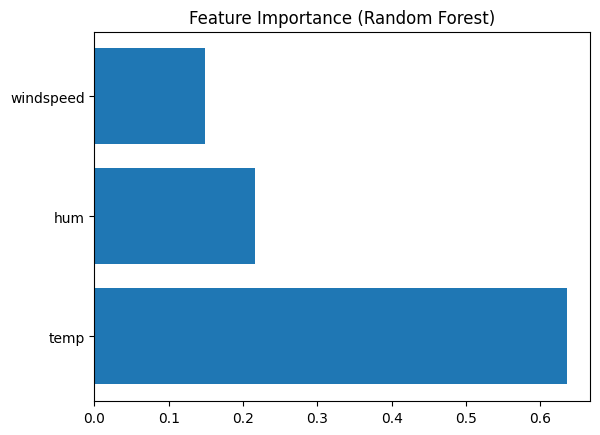

In [ ]:
# Feature Importance untuk Random Forest
features = X.columns
importances = rf_model.feature_importances_

# Visualisasi Feature Importance
plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

**Insight:**
Berdasarkan bar plot di atas, dapat diketahui bahwa feature yang paling berpengaruh terhadap prediksi model adalah temp, diikuti oleh hum dan windspeed.

In [ ]:
# Membuat model Random Forest dengan parameter terbaik
best_rf_model = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=300, random_state=42)
best_rf_model.fit(X_train, y_train)

# Prediksi dengan model Random Forest yang dioptimalkan
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluasi model Random Forest yang dioptimalkan
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest MSE: {mse_best_rf}")
print(f"Optimized Random Forest R-squared: {r2_best_rf}")

Optimized Random Forest MSE: 1799304.9731584361
Optimized Random Forest R-squared: 0.5512823460476037


**Insight:**

Model yang dioptimalkan menunjukkan peningkatan signifikan dalam akurasi prediksi. Nilai MSE yang lebih rendah dan R² yang lebih tinggi menunjukkan bahwa optimisasi hyperparameter berhasil meningkatkan performa model.

**Kesimpulan:**

1. Model regresi linier dan Random Forest (setelah dioptimalkan) memberikan insight yang berharga tentang pengaruh variabel cuaca terhadap jumlah peminjaman sepeda.

2. Model yang dioptimalkan menunjukkan peningkatan performa signifikan, mengurangi MSE dan meningkatkan R².

3. Insight ini dapat digunakan untuk pengambilan keputusan strategis dan perencanaan operasional serta pemasaran.
    * Strategi Operasional dan Pemasaran:
    1. Fokus pada promosi pada hari-hari dengan suhu yang lebih hangat untuk meningkatkan jumlah peminjaman sepeda.
    2. Cari cara untuk mengurangi dampak negatif dari kelembaban dan kecepatan angin, misalnya dengan menyediakan fasilitas yang membuat bersepeda lebih nyaman dalam kondisi cuaca tersebut.

# Conclusion

#### **Pertanyaan 1**
Bagaimana Perbandingan Jumlah Penyewaan Sepeda pada Workingday dan Holiday?

**Insight:**
* Berdasarkan analisis, penyewaan sepeda cenderung lebih tinggi pada workingday (hari kerja) dibandingkan holiday (hari libur). Proposi penyewaan sepeda pada hari kerja adalah sekitar 96.7%, sedangkan pada hari libur hanya 3.3%.
* Hasil:
    * Total penyewaan sepeda pada hari kerja: 96.7% atau 2.292.410 User.
    * Total penyewaan sepeda pada hari libur: 3.3% atau 78.435 User.
* Interpretasi:
Menunjukkan bahwa banyak pengguna yang menyewa sepeda untuk alat transportasi dalam bekerja atau beraktivitas rutin selama hari kerja.

**Strategi Pemasaran:**
Melakukan promosi khusus pada hari kerja dan hari libur, untuk menarik lebih banyak pengguna.




#### **Pertanyaan 2**
Rata-rata jam berapa pengguna menggunakan rental bike sharing?

**Insight:**
* Berdasarkan analisis, penyewaan sepeda paling banyak terjadi pada jam 16 atau 4 sore.
* Interpretasi: Menunjukkan bahwa sekitar jam 4 sore adalah waktu paling banyak pengguna menyewa sepeda untuk alat transportasi dalam aktivitas pulang kerja, sekolah, bahkan untuk berolahraga

**Strategi Pemasaran:**
1. Pada jam-jam tertentu seperti jam sibuk yaitu jam 4 sore, perusahaan bisa melakukan penambahan fasilitas dan melakukan maintenance secara rutin pada jam-jam tersebut.
2. Mengembangkan aplikasi mobile yang dapat memberikan informasi real-time tentang ketersediaan sepeda dan stasiun docking terdekat, terutama pada jam-jam sibuk.


#### **Pertanyaan 3**
Bagaimana distribusi penyewaan sepeda antara 2011 dan 2012?

**Insight:**
* Berdasarkan analisis, diketahui bahwa perbandingan penyewa sepeda antara tahun 2011 dengan 2012 mengalami peningkatan yang positif. Di mana pada tahun 2011 total penyewanya sebesar 1.243.103, sedangkan pada tahun 2012 mengalami peningkatan sebesar 2.049.576.

**Strategi Pemasaran:**
1. Memperkenalkan program loyalitas atau reward bagi pengguna yang sering menyewa sepeda. Misalnya, memberikan poin atau diskon khusus bagi pengguna setia yang mencapai jumlah penyewaan tertentu dalam setahun.
2. Melakukan survei kepuasan pelanggan untuk mengumpulkan masukan mengenai kualitas layanan. Dengan demikian, perusahaan dapat melakukan perbaikan yang diperlukan untuk meningkatkan pengalaman pengguna.

#### **Pertanyaan 4**
Musim apa yang penggunanya paling banyak menggunakan bike sharing?

**Insight:**
* Berdasarkan analisis, diketahui bahwa total penyewaan sepeda terbanyak berada pada musim summer sebesar 1.061.129 dan diikuti oleh spring. Artinya, para penyewa lebih memilih rental bike pada musim tersebut karena pada musim summer adalah musim terbaik untuk bersepeda atau beraktivitas dibandingkan dengan musim-musim lainnya.

**Strategi Pemasaran:**
1. Menawarkan paket khusus musim panas, seperti diskon atau penawaran bundel untuk mendorong lebih banyak pengguna menyewa sepeda selama musim panas.
2. Menyediakan lebih banyak unit sepeda dan melakukan maintenance rutin untuk memastikan sepeda dalam kondisi baik selama musim panas, mengingat tingginya permintaan pada musim ini.

#### **Pertanyaan 5**
Adakah hubungan antara temp, hum, windspeed terhadap jumlah penyewaan sepeda?

**Insight:**
1. Model regresi linier dan Random Forest (setelah dioptimalkan) memberikan insight yang berharga tentang pengaruh variabel cuaca terhadap jumlah peminjaman sepeda.
2. Model yang dioptimalkan menunjukkan peningkatan performa signifikan, mengurangi MSE dan meningkatkan R².

**Strategi Pemasaran:**
1. Fokus pada promosi pada hari-hari dengan suhu yang lebih hangat untuk meningkatkan jumlah peminjaman sepeda.
2. Cari cara untuk mengurangi dampak negatif dari kelembaban dan kecepatan angin, misalnya dengan menyediakan
fasilitas yang membuat bersepeda lebih nyaman dalam kondisi cuaca tersebut.